In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

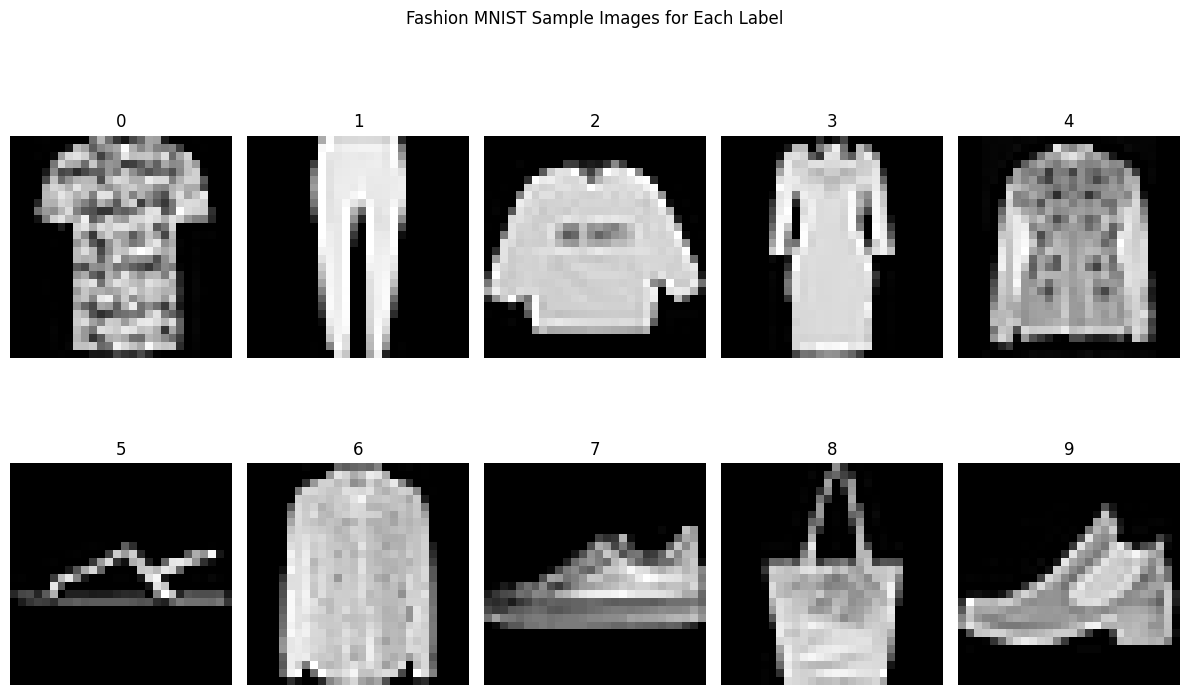

In [10]:
plt.figure(figsize=(12, 8))

for i in range(10):
    img = train_df[train_df['label'] == i].iloc[0, 1:].values.reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(i)
    plt.axis('off')

plt.suptitle('Fashion MNIST Sample Images for Each Label')
plt.tight_layout()
plt.show()


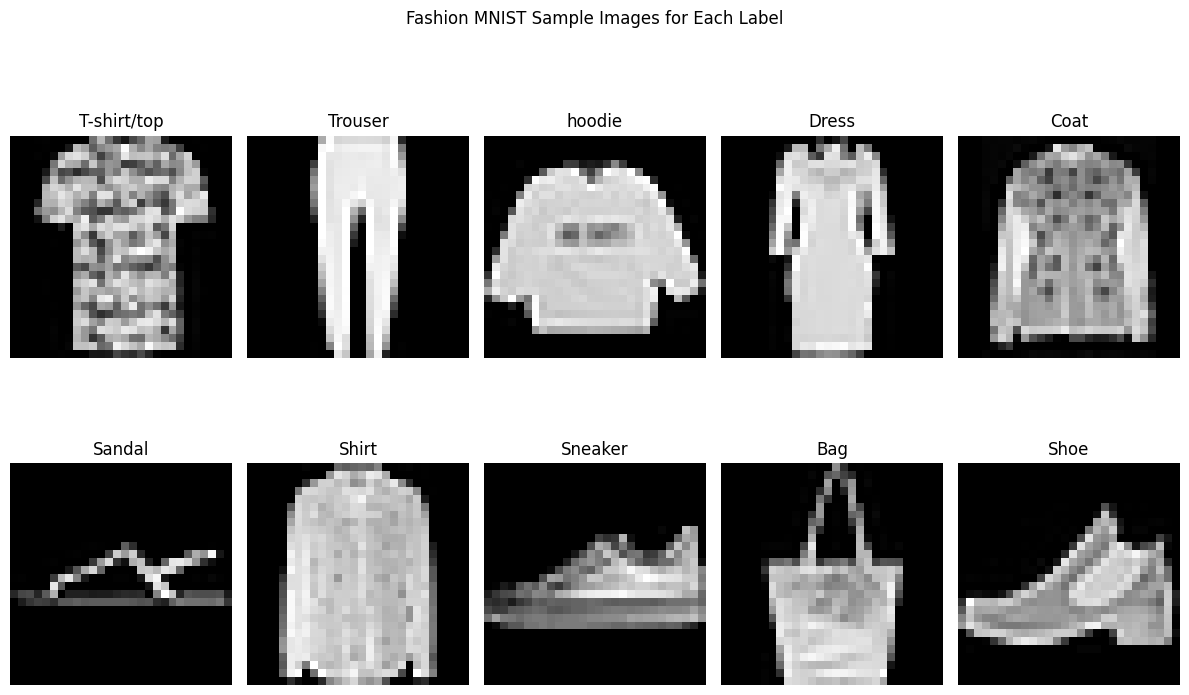

In [12]:
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "hoodie",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Shoe"
}

plt.figure(figsize=(12, 8))

for i in range(10):
    img = train_df[train_df['label'] == i].iloc[0, 1:].values.reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label_names[i])
    plt.axis('off')

plt.suptitle('Fashion MNIST Sample Images for Each Label')
plt.tight_layout()
plt.show()


In [13]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [15]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat), batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.6695 - loss: 0.9327 - val_accuracy: 0.8498 - val_loss: 0.4103
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8375 - loss: 0.4521 - val_accuracy: 0.8743 - val_loss: 0.3405
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8620 - loss: 0.3913 - val_accuracy: 0.8840 - val_loss: 0.3104
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8731 - loss: 0.3528 - val_accuracy: 0.8850 - val_loss: 0.3008
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8806 - loss: 0.3324 - val_accuracy: 0.9006 - val_loss: 0.2671
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8860 - loss: 0.3152 - val_accuracy: 0.9035 - val_loss: 0.2597
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8965 - loss: 0.2886 - val_accuracy: 0.9068 - val_loss: 0.2550
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8998 - loss: 0.2812 - 

In [21]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9104 - loss: 0.2380
Test Accuracy: 0.9113


In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.92      0.82      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.81      0.91      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.73      0.74      1000
           7       0.97      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



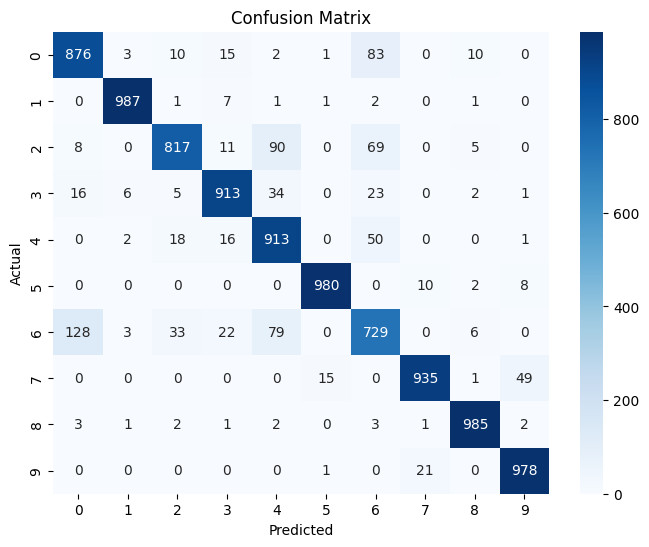

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()